In [3]:
import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn                 # Advanced Data visualization Library

[x for x in dir(list) if not '__' in x]


['append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

For the remainder of the semester our group will be working with a FIFA 18 COMPLETE PLAYER DATASET, that can be found on kaggle.com. The size of this dataset is approximately 17981 x 75, which includes features that range from the players name to their individual agility in the game. The dataset provides the positions played by the individual as well as their current salary from their respective club. It is also important to note that the players age and club is represented in the data. There are a few features within this dataset that we do not specifically need in order to answer our question such as their photo and team flag, which we have programmed to remove. With the time that we have worked with this dataset we realized that majority of the features are strings and need to be converted into an integer because there are some values represented as objects and we cannot use them. Along with missing data and attributes that include symbols that we will remove. Removing these feature will not specifically remove the player as a whole but just that specific attribute.This data is important to help develop the game and advance the sport of soccer. It would also be important to anyone who is responsible for paying the players because they would want to make sure they don’t overpay or miss out on a once in a lifetime player. These attributes give value to each specific player. There is a lot of importance when it comes to the success of the club as well because without good players the team won’t win. We think that this data could also be important to determine the longevity of a players career and determine if the player is really deserving of a large contract or that the club should pass on the player and select a younger player for their roster.
Working with this data set we are able to ask a few questions such as:
 What attributes have the most significance when it comes to a players salary?
Can we predict the players salary based on their position?
Relating specific attributes to an individual players salary. 
Given the players rating of … can their salary be determined?
Do certain positions pay more compared to others?	
Do certain teams pay more compared to others?
Can we predict a players’ position based on their ability rankings?
We think that initially we are going to look at our data set and try to analyze our problem as a regression type. We have discussed the ability to switch to a categorical question later on because we have a lot of data points and attributes that we could use. 


In [4]:
fifa = pa.read_csv('Desktop/CompleteDataset.csv', low_memory=False)


In [21]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Position
0,Cristiano Ronaldo,32.0,Portugal,94,94,Real Madrid CF,€95.5M,€565K,89.0,63,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30.0,Argentina,93,93,FC Barcelona,€105M,€565K,92.0,48,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25.0,Brazil,92,94,Paris Saint-Germain,€123M,€280K,94.0,56,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30.0,Uruguay,92,92,FC Barcelona,€97M,€510K,88.0,78,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31.0,Germany,92,92,FC Bayern Munich,€61M,€230K,58.0,29,...,55,25,11,61,44,10,83,70,11,GK


In [43]:
C = fifa.groupby(['Club']).sum()
C

,Age,Overall,Potential,Acceleration
Club,,,,
SSV Jahn Regensburg,688.0,1781.0,1924,1768.0
1. FC Heidenheim,640.0,1730.0,1852,1648.0
1. FC Kaiserslautern,656.0,1880.0,2100,2410.0
1. FC Köln,725.0,2180.0,2345,1939.0
1. FC Magdeburg,630.0,1623.0,1724,1562.0
1. FC Nürnberg,692.0,1894.0,2042,1825.0
1. FC Union Berlin,685.0,1839.0,1981,1813.0
1. FSV Mainz 05,726.0,2154.0,2337,2052.0
AC Ajaccio,609.0,1518.0,1668,1506.0


In [31]:
X = fifa["Age"] = fifa.Age.astype(float)
Y = fifa["Acceleration"] = fifa.Acceleration.astype(float)
Z = fifa["Overall"] = fifa.Overall.astype(float)

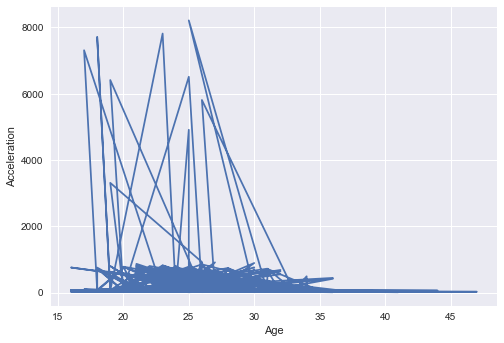

In [28]:
plt.plot(X, Y)
plt.ylabel('Acceleration')
plt.xlabel('Age')
plt.show()



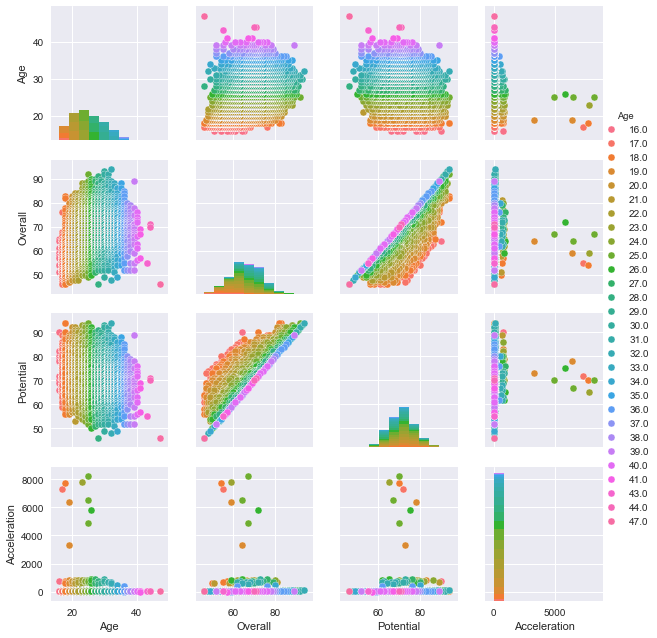

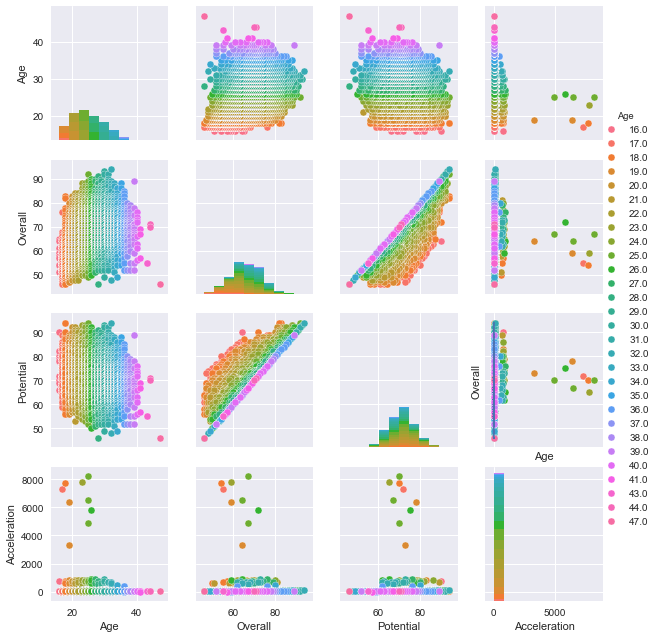

In [44]:
plt.plot(X,Z)
plt.ylabel('Overall')
plt.xlabel('Age')
plt.show()


In [11]:
#This should drop all rows containing + from the column aggression
fifa = fifa[~fifa['Aggression'].isin(['+'])]

In [50]:
A = fifa.groupby('Club')['Overall'].count()
B = fifa.groupby('Club')['Age'].count()
A



Club
 SSV Jahn Regensburg        28
1. FC Heidenheim            26
1. FC Kaiserslautern        29
1. FC Köln                  30
1. FC Magdeburg             25
1. FC Nürnberg              28
1. FC Union Berlin          27
1. FSV Mainz 05             30
AC Ajaccio                  24
AC Horsens                  24
AD Alcorcón                 25
ADO Den Haag                26
AEK Athens                  28
AFC Eskilstuna              27
AFC Wimbledon               27
AIK Solna                   24
AJ Auxerre                  30
AS Monaco                   33
AS Nancy Lorraine           26
AS Saint-Étienne            30
AZ Alkmaar                  27
Aalborg BK                  27
Aalesunds FK                22
Aarhus GF                   27
Aberdeen                    24
Accrington Stanley          24
Adelaide United             20
Ajax                        29
Akhisar Belediyespor        26
Al Ahli                     31
                            ..
Vitória                     20
Vit

In [51]:
B


Club
 SSV Jahn Regensburg        28
1. FC Heidenheim            26
1. FC Kaiserslautern        29
1. FC Köln                  30
1. FC Magdeburg             25
1. FC Nürnberg              28
1. FC Union Berlin          27
1. FSV Mainz 05             30
AC Ajaccio                  24
AC Horsens                  24
AD Alcorcón                 25
ADO Den Haag                26
AEK Athens                  28
AFC Eskilstuna              27
AFC Wimbledon               27
AIK Solna                   24
AJ Auxerre                  30
AS Monaco                   33
AS Nancy Lorraine           26
AS Saint-Étienne            30
AZ Alkmaar                  27
Aalborg BK                  27
Aalesunds FK                22
Aarhus GF                   27
Aberdeen                    24
Accrington Stanley          24
Adelaide United             20
Ajax                        29
Akhisar Belediyespor        26
Al Ahli                     31
                            ..
Vitória                     20
Vit

In [ ]:
plt.plot(A,B)
plt.show()